In [19]:
import pandas as pd

file_path = "../data/Modele_decisionnel.csv"
# Charger le fichier CSV
df = pd.read_csv(file_path, sep=';', header=None)
    
    # Nettoyage et restructuration des données
df_clean = df.iloc[2:6, 1:4].reset_index(drop=True)
df_clean.columns = ["Sol Sableux", "Sol Limoneux", "Sol Argileux"]
df_clean.index = ["θcrit_min", "θcrit_max", "θfc", "θwp"]
df_clean = df_clean.apply(pd.to_numeric)
    
    # Calculer θcrit moyen
df_clean.loc["θcrit"] = (df_clean.loc["θcrit_min"] + df_clean.loc["θcrit_max"]) / 2
    
    # Calculer les valeurs de θopt
df_clean.loc["θopt_racinaires_profonds"] = (df_clean.loc["θfc"]+5 + df_clean.loc["θcrit"]) / 2
df_clean.loc["θopt_racinaires_profonds_min"] = (df_clean.loc["θfc"]+5 + df_clean.loc["θcrit_min"]) / 2
df_clean.loc["θopt_racinaires_profonds_max"] = (df_clean.loc["θfc"]+5 + df_clean.loc["θcrit_max"]) / 2

df_clean.loc["θopt_racinaires_moyens"] = df_clean.loc["θfc"] - 0.1 * (df_clean.loc["θfc"] - df_clean.loc["θwp"])

df_clean.loc["θopt_racinaires_superficiels"] = df_clean.loc["θcrit"] -5 + 0.1 * (df_clean.loc["θfc"] - df_clean.loc["θcrit"]-5)    
df_clean.loc["θopt_racinaires_superficiels_min"] = df_clean.loc["θcrit_min"]-5 + 0.1 * (df_clean.loc["θfc"] - df_clean.loc["θcrit_min"]-5)
df_clean.loc["θopt_racinaires_superficiels_max"] = df_clean.loc["θcrit_max"]-5 + 0.1 * (df_clean.loc["θfc"] - df_clean.loc["θcrit_max"]-5)
    
print( df_clean)




                                  Sol Sableux  Sol Limoneux  Sol Argileux
θcrit_min                                10.0          15.0          20.0
θcrit_max                                12.0          17.0          22.0
θfc                                      15.0          25.0          40.0
θwp                                       5.0          10.0          20.0
θcrit                                    11.0          16.0          21.0
θopt_racinaires_profonds                 15.5          23.0          33.0
θopt_racinaires_profonds_min             15.0          22.5          32.5
θopt_racinaires_profonds_max             16.0          23.5          33.5
θopt_racinaires_moyens                   14.0          23.5          38.0
θopt_racinaires_superficiels              5.9          11.4          17.4
θopt_racinaires_superficiels_min          5.0          10.5          16.5
θopt_racinaires_superficiels_max          6.8          12.3          18.3


[15. 25. 40.] [ 5. 10. 20.]


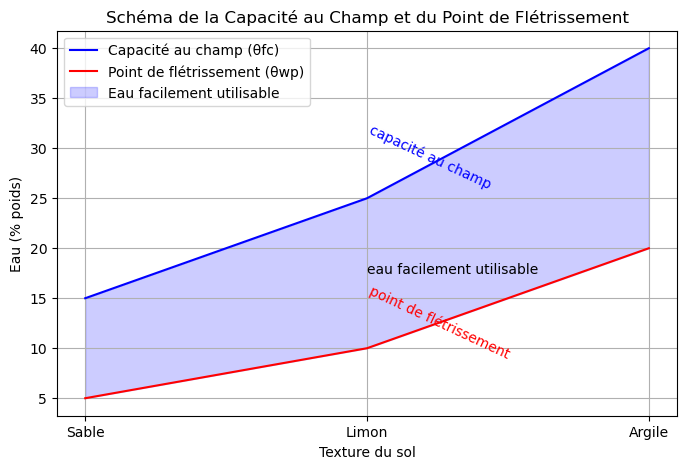

In [20]:
import matplotlib.pyplot as plt

# Extraire les valeurs nécessaires
textures = ["Sable", "Limon", "Argile"]
theta_fc = df_clean.loc["θfc"].values
theta_wp = df_clean.loc["θwp"].values

print(theta_fc, theta_wp)

# Tracer les courbes
plt.figure(figsize=(8,5))
plt.plot(textures, theta_fc, color='blue', label="Capacité au champ (θfc)")
plt.plot(textures, theta_wp, color='red', label="Point de flétrissement (θwp)")

# Ajouter annotations
plt.fill_between(textures, theta_wp, theta_fc, color='blue', alpha=0.2, label="Eau facilement utilisable")
plt.text(1, (theta_fc[1] + theta_wp[1]) / 2, "eau facilement utilisable", fontsize=10, rotation=0)
plt.text(1, theta_fc[1] + 1, "capacité au champ", fontsize=10, rotation=-25, color='blue')
plt.text(1, theta_wp[1] - 1, "point de flétrissement", fontsize=10, rotation=-25, color='red')

# Labels et titre
plt.xlabel("Texture du sol")
plt.ylabel("Eau (% poids)")
plt.title("Schéma de la Capacité au Champ et du Point de Flétrissement")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


[15.5 23.  33. ]
[14.  23.5 38. ]
[ 5.9 11.4 17.4]


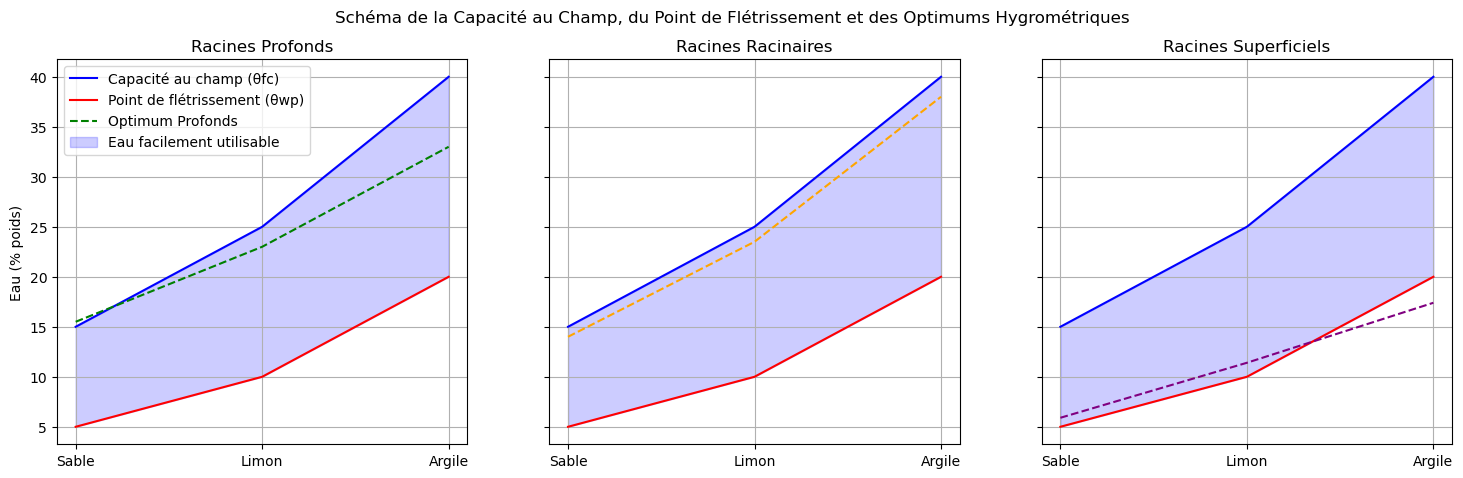

In [23]:
# Extraire les valeurs des différents types de racines
theta_opt_profonds = df_clean.loc["θopt_racinaires_profonds"].values
theta_opt_moyens = df_clean.loc["θopt_racinaires_moyens"].values
theta_opt_superficiels = df_clean.loc["θopt_racinaires_superficiels"].values

# Création des graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Liste des types de racines
types_racines = ["Profonds", "Racinaires", "Superficiels"]
theta_opts = [theta_opt_profonds, theta_opt_moyens, theta_opt_superficiels]
couleurs = ["green", "orange", "purple"]

for i, ax in enumerate(axes):
    ax.plot(textures, theta_fc, color='blue', label="Capacité au champ (θfc)")
    ax.plot(textures, theta_wp, color='red', label="Point de flétrissement (θwp)")
    ax.plot(textures, theta_opts[i], color=couleurs[i], linestyle='dashed', label=f"Optimum {types_racines[i]}")
    print(theta_opts[i])
    
    ax.fill_between(textures, theta_wp, theta_fc, color='blue', alpha=0.2, label="Eau facilement utilisable")
    
    ax.set_title(f"Racines {types_racines[i]}")
    ax.grid(True)

axes[0].set_ylabel("Eau (% poids)")
axes[0].legend()

# Affichage
plt.suptitle("Schéma de la Capacité au Champ, du Point de Flétrissement et des Optimums Hygrométriques")
plt.show()
